In [1]:
import os
import sys
import random
import warnings
import cv2

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from tqdm import tqdm
from itertools import chain
from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.transform import resize
from skimage.morphology import label

from keras.models import Model, load_model
from keras.layers import Input
from keras.layers.core import Dropout, Lambda
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K

import tensorflow as tf

# Set some parameters
IMG_WIDTH = 152
IMG_HEIGHT = 60
IMG_CHANNELS = 3
TRAIN_PATH =r'C:\Users\jmlee\Desktop\4학년 1학기\졸프\U-Net\input_train'
TEST_PATH =r'C:\Users\jmlee\Desktop\4학년 1학기\졸프\U-Net\input_test'

warnings.filterwarnings('ignore', category=UserWarning, module='skimage')
seed = 42
random.seed = seed
np.random.seed = seed

Using TensorFlow backend.
C:\Users\jmlee\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\jmlee\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\jmlee\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\jmlee\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

## Train

In [2]:
#한글이름 사진 로드
def hangulFilePathImageRead (filePath ) :

    stream = open( filePath.encode("utf-8") , "rb")
    bytes = bytearray(stream.read())
    numpyArray = np.asarray(bytes, dtype=np.uint8)

    return cv2.imdecode(numpyArray , cv2.IMREAD_COLOR)  #3채널로 가져오기

if __name__ == '__main__':
    for f in os.listdir(TRAIN_PATH):  
        if f.split('.')[1] =='jpg':
            filePath = (r"C:/Users/jmlee/Desktop/4학년 1학기/졸프/U-Net/input_train"+'/'+f)  
            train_ids = hangulFilePathImageRead(filePath)
            

In [3]:
f

'[SEG]전태산_1_1_0_943.jpg'

In [4]:
train_ids

array([[[ 23,  23,  23],
        [ 25,  25,  25],
        [ 28,  28,  28],
        ...,
        [136, 136, 136],
        [125, 125, 125],
        [117, 117, 117]],

       [[ 23,  23,  23],
        [ 24,  24,  24],
        [ 24,  24,  24],
        ...,
        [125, 125, 125],
        [124, 124, 124],
        [119, 119, 119]],

       [[ 21,  21,  21],
        [ 21,  21,  21],
        [ 20,  20,  20],
        ...,
        [120, 120, 120],
        [118, 118, 118],
        [108, 108, 108]],

       ...,

       [[ 34,  34,  34],
        [ 35,  35,  35],
        [ 35,  35,  35],
        ...,
        [ 53,  53,  53],
        [ 42,  42,  42],
        [ 38,  38,  38]],

       [[ 38,  38,  38],
        [ 37,  37,  37],
        [ 37,  37,  37],
        ...,
        [ 53,  53,  53],
        [ 44,  44,  44],
        [ 40,  40,  40]],

       [[ 41,  41,  41],
        [ 41,  41,  41],
        [ 40,  40,  40],
        ...,
        [ 53,  53,  53],
        [ 43,  43,  43],
        [ 38,  38,  38]]

## Test

In [3]:
if __name__ == '__main__':
    for f_ in os.listdir(TEST_PATH):  
        if f_.split('.')[1] =='jpg':
            filePath = (r"C:/Users/jmlee/Desktop/4학년 1학기/졸프/U-Net/input_test"+'/'+f_)  
            test_ids = hangulFilePathImageRead(filePath)
#             print(f_)

In [6]:
f_

'허환이_9_9_0_9730.jpg'

## 추출된 이미지

In [86]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import cv2
block_size = 15 # 픽셀에 적용할 threshold값을 계산하기 위한 블럭 크기. 적용될 픽셀이 블럭의 중심이 됨. 따라서 blocksize 는 홀수여야 함
subtract_val = 2  #  보정 상수
TEST_PATH=r"C:/Users/jmlee/Desktop/4학년 1학기/졸프/U-Net/정맥추출_전체(152X60)/"
if __name__ == '__main__':
    for f_ in os.listdir(TEST_PATH):  
        if f_.split('.')[1] =='jpg': 
            img = imread(TEST_PATH+f_,0)
            ret1, th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
            ret2, th2 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
            blur = cv2.GaussianBlur(img,(5,5),0)
            ret3, th3 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
            
plt.imshow(img)
plt.show()

error: OpenCV(3.4.2) C:\projects\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1406: error: (-215:Assertion failed) src.type() == (((0) & ((1 << 3) - 1)) + (((1)-1) << 3)) in function 'cv::threshold'


In [88]:
type(img)
len(img)

60

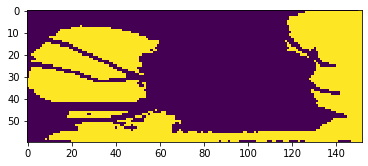

In [81]:
plt.imshow(th3)

## 데이터 전처리

In [42]:
# Get and resize train images and masks
X_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)
print('Getting and resizing train images and masks ... ')
sys.stdout.flush()
for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)): #tqdm:진행바 표시
#     path = TRAIN_PATH + id_
#     print(path)
    path='C:/Users/jmlee/Desktop/4학년 1학기/졸프/U-Net/input_train/'
    img = imread(path+f)[:,:,:IMG_CHANNELS]
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_train[n] = img
    mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)
    for mask_file in next(os.walk(path + '/masks/'))[2]:
        mask_ = imread(path + '/masks/' + mask_file)
        mask_ = np.expand_dims(resize(mask_, (IMG_HEIGHT, IMG_WIDTH), mode='constant', 
                                      preserve_range=True), axis=-1)
        mask = np.maximum(mask, mask_)
    Y_train[n] = mask

# Get and resize test images
X_test = np.zeros((len(test_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
sizes_test = []
print('Getting and resizing test images ... ')
sys.stdout.flush()
for n, id_ in tqdm(enumerate(test_ids), total=len(test_ids)):
    path='C:/Users/jmlee/Desktop/4학년 1학기/졸프/U-Net/input_test/'
    img = imread(path+f_)[:,:,:IMG_CHANNELS]
    sizes_test.append([img.shape[0], img.shape[1]])
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_test[n] = img

print('Done!')

Getting and resizing train images and masks ... 


  0%|                                                                                           | 0/60 [00:00<?, ?it/s]


StopIteration: 